In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [2]:
np.linspace(1, 2, 6)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [6]:
np.logspace(-3, 2, 6)
# array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
#        0.001   0.01    0.1     1       10      100

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [11]:
np.array(np.arange(36))  # 0 ~ 35

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [12]:
np.array(np.arange(36)).reshape(6,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

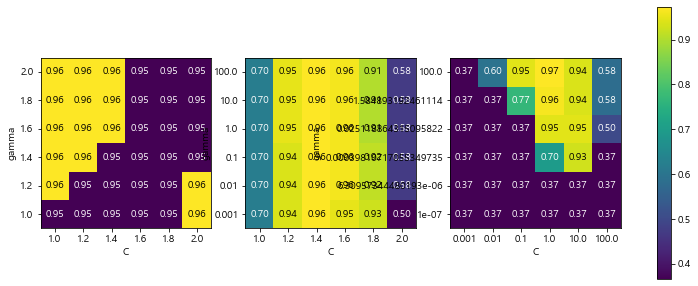

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(13,5))
param_grid_linear = {"C":np.linspace(1, 2, 6), "gamma":np.linspace(1,2,6)}
param_grid_one_log = {"C":np.linspace(1,2,6), "gamma":np.logspace(-3, 2, 6)}
param_grid_range = {"C":np.logspace(-3,2,6), "gamma":np.logspace(-7,2,6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    #print("gamma:", param_grid['gamma'])
    #print("C:", param_grid['C'])
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    #print(scores)
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='C', ylabel='gamma', xticklabels=param_grid["C"],
        yticklabels=param_grid['gamma'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [25]:
param_grid = [{'kernel':['rbf'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
print(param_grid)

[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameter:", grid_search.best_params_)